In [1]:
#Import the packages to be used.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
#Import our data.
albumdf = pd.read_csv('atmosphere_album_data', header=0)
songdf = pd.read_csv('atmosphere_song_lyrics', header=0)

In [9]:
#Remove unwanted columns. Need to address the index column being saved in the csv files.
albumdf.drop(['Unnamed: 0', 'Songs'], axis=1, inplace=True)
songdf.drop(['Unnamed: 0'], axis=1, inplace=True)

In [29]:
#Create a length feature for each song, as well as a count of unique words
from collections import Counter
songdf['WordCount'] = songdf['SongLyrics'].map(len)
songdf['UniqueWords'] = songdf['SongLyrics'].apply(lambda words: len(list(Counter(words.split()).keys())))

In [34]:
from nltk.corpus import stopwords
stopword_set = set(stopwords.words('english'))
#Create the same two columns, but with stopwords removed
songdf['WordCountNS'] = songdf['SongLyrics'].apply(lambda words: len(' '.join([w for w in words.split() if w not in stopword_set])))
songdf['UniqueWordsNS'] = songdf['SongLyrics'].apply(lambda words: len(list(Counter([w for w in words.split() if w not in stopword_set]).keys())))

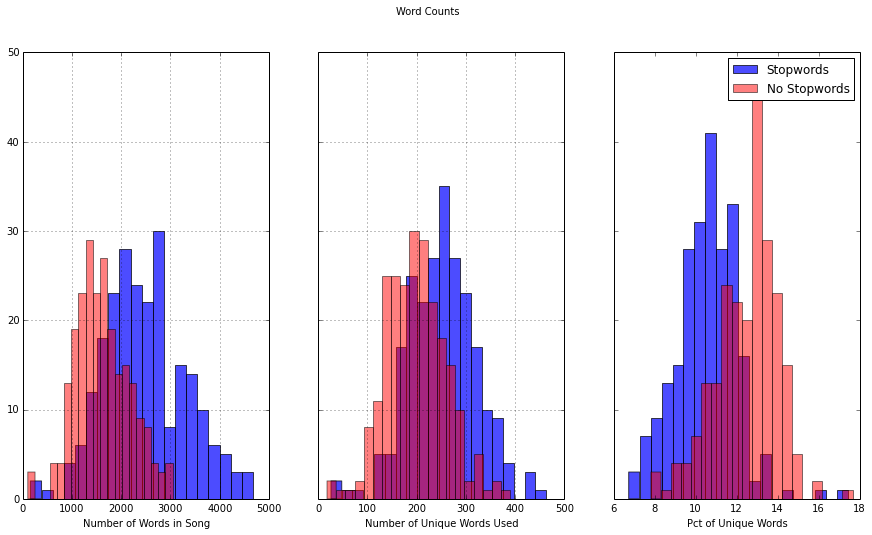

In [52]:
#Plot the new columns and compare them to the columns without stopwords
fig, ax = plt.subplots(ncols=3, sharey=True, figsize=(15,8))
songdf['WordCount'].hist(bins=20, alpha=0.7, ax=ax[0])
songdf['UniqueWords'].hist(bins=20, alpha=0.7, ax=ax[1])
ax[2].hist(x=100*(songdf['UniqueWords']/songdf['WordCount']), bins=20, alpha=0.7)
ax[0].set_xlabel('Number of Words in Song')
ax[1].set_xlabel('Number of Unique Words Used')
ax[2].set_xlabel('Pct of Unique Words')
songdf['WordCountNS'].hist(bins=20, color='red', alpha=0.5, ax=ax[0])
songdf['UniqueWordsNS'].hist(bins=20, color='red', alpha=0.5, ax=ax[1])
ax[2].hist(x=100*(songdf['UniqueWordsNS']/songdf['WordCountNS']), color='red', bins=20, alpha=0.5)
plt.suptitle('Word Counts')
plt.legend(('Stopwords', 'No Stopwords'))

So by removing the stopwords we reduce the number of words and number of unique words used, but the percentage
of unique words rises.

In [55]:
albumdf

,AlbumID,AlbumName
0,7391,Overcast!
1,5001,Lucy Ford: The Atmosphere EPs
2,5005,God Loves Ugly
3,3262,Seven's Travels
4,7592,Headshots: SE7EN
5,5146,You Can't Imagine How Much Fun We're Having
6,7187,Happy Clown Bad Dub 8 / Fun EP
7,6298,Sad Clown Bad Summer #9
8,7048,Sad Clown Bad Fall #10
9,7050,Sad Clown Bad Winter #11


In [61]:
joindf = songdf.merge(albumdf, on='AlbumID')
joindf

,SongName,AlbumID,SongResponse,SongURL,SongLyrics,WordCount,UniqueWords,WordCountNS,UniqueWordsNS,AlbumName
0,Like A Fire,43755,200,https://genius.com/Atmosphere-like-a-fire-lyrics,intro a recording its like hi this is a recor...,1887,195,1312,148,Fishing Blues
1,Ringo,43755,200,https://genius.com/Atmosphere-ringo-lyrics,verse 1 i think im still drunk from last nigh...,2963,228,2186,176,Fishing Blues
2,Besos,43755,200,https://genius.com/Atmosphere-besos-lyrics,verse 1 slug 1up never still if the sun up it...,2561,271,1793,217,Fishing Blues
3,Pure Evil,43755,200,https://genius.com/Atmosphere-pure-evil-lyrics,chorus i b e no no no no no oh no no no i don...,1499,153,876,107,Fishing Blues
4,Perfect,43755,200,https://genius.com/Atmosphere-perfect-lyrics,hook 1 fall from the sky just to learn how to...,2517,242,1628,186,Fishing Blues
5,Seismic Waves,43755,200,https://genius.com/Atmosphere-seismic-waves-ly...,verse 1 armageddon started i guess it wasnt t...,2476,251,1698,205,Fishing Blues
6,Next To You,43755,200,https://genius.com/Atmosphere-next-to-you-lyrics,hook dem atlas darlin you dont even know im l...,1975,188,1291,140,Fishing Blues
7,The Shit That We've Been Through,43755,200,https://genius.com/Atmosphere-the-shit-that-we...,verse 1 slug seven in the morning locked the ...,1884,169,1153,132,Fishing Blues
8,When The Lights Go Out,43755,200,https://genius.com/Atmosphere-when-the-lights-...,verse 1 slug do you remember that knife you w...,2544,243,1547,188,Fishing Blues
9,No Biggie,43755,200,https://genius.com/Atmosphere-no-biggie-lyrics,verse slug she said no biggie territorial eno...,1579,177,1037,135,Fishing Blues


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


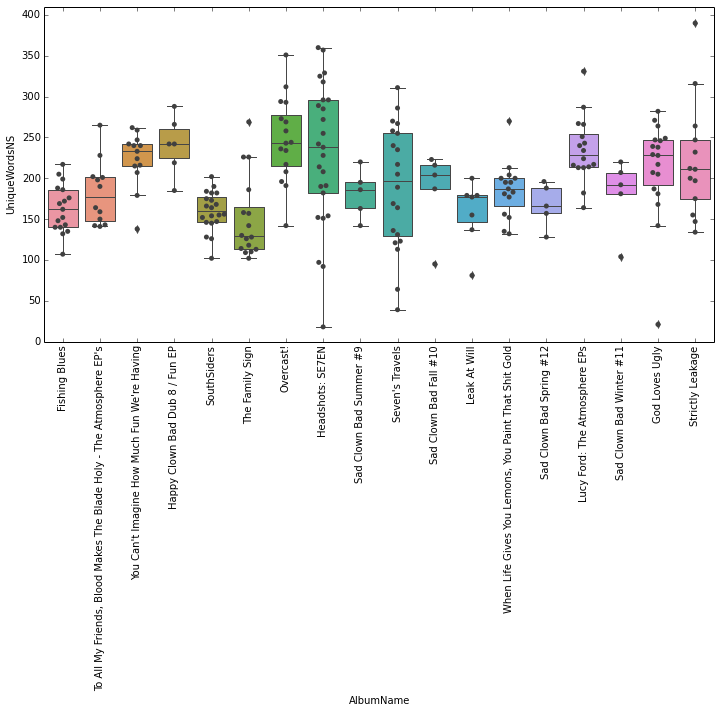

In [100]:
joindf.sort_values(by='UniqueWordsNS', axis=0, ascending=False)
plt.figure(figsize=(12,6))
p = sns.boxplot(x='AlbumName', y='UniqueWordsNS', data=joindf)
p = sns.swarmplot(x='AlbumName', y='UniqueWordsNS', data=joindf, color="0.25")
plt.xticks(rotation=90);
plt.ylim((0,410));